## 1. 도수분포표, 막대그래프, 원형그래프

In [9]:
# 도수분포표
import numpy as np
death = np.array([2, 1, 2, 4, 2, 5, 3, 3, 3, 5, 6, 3, 8, 3,
                  3, 6, 3, 6, 5, 3, 5, 2, 6, 2, 3, 4, 3, 3,
                  2, 9, 2, 2, 3, 2, 7, 3, 2, 10, 6, 2, 3, 4,])

import pandas as pd

table = pd.crosstab(index = death, colnames = ["disease"], columns = "count")
table.index = ["Infection", "Cancer", "Circulatory System", "Respiratory System", "Digestive System",
               "Accident", "Urogenital System", "Mental Disorder", "Senility", "Nervous System"]
print(table)

disease             count
Infection               1
Cancer                 11
Circulatory System     14
Respiratory System      3
Digestive System        4
Accident                5
Urogenital System       1
Mental Disorder         1
Senility                1
Nervous System          1


**colnames, columns 형식 주의!!**

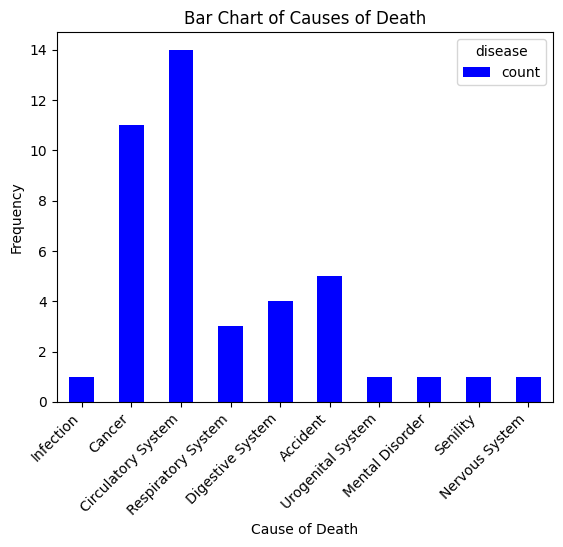

In [14]:
# 막대그래프
import matplotlib.pyplot as plt
table.plot(kind='bar', color='blue', legend='False')
plt.xlabel('Cause of Death')
plt.ylabel('Frequency')
plt.title("Bar Chart of Causes of Death")
plt.xticks(rotation=45, ha='right') # ha='right' 옵션은 라벨을 오른쪽 정렬하여 더 깔끔하게 보입니다.
plt.show()

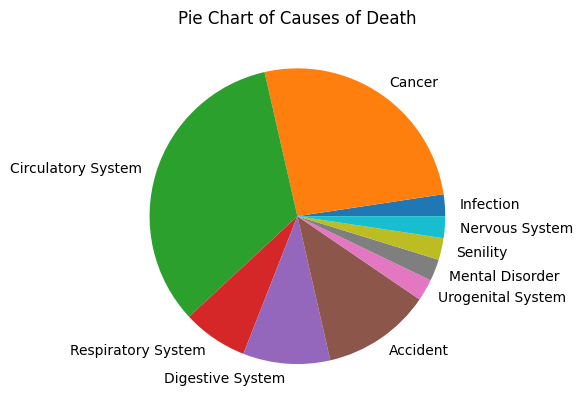

In [16]:
# 원형그래프
import matplotlib.pyplot as plt
plt.pie(table['count'], labels=table.index)
plt.title("Pie Chart of Causes of Death")
plt.show()

**plt.pie() 함수가 1차원(1D) 데이터를 필요로 한다!**

## 2. 히스토그램 & 도수다각형

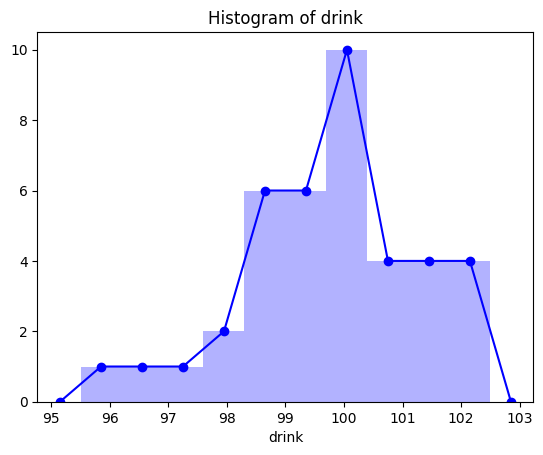

In [21]:
import numpy as np
drink = np.array([101.8, 101.5, 101.8, 102.5, 101, 96.8, 102.4, 100, 98.8, 98.1,
                  98.8, 98, 99.4, 95.5, 100.1, 100.5, 97.4, 100.2, 101.4, 98.7,
                  101.4, 99.4, 101.7, 99, 99.7, 98.9, 99.5, 100, 99.7, 100.9,
                  99.7, 99, 98.8, 99.7, 98.9, 99.5, 100, 99.7, 100.9])

import matplotlib.pyplot as plt

plt.figure()
n, bins, patches = plt.hist(drink, bins = 10, facecolor = "blue", alpha = 0.3) # 10개의 구간으로 나눈다. 투명도는 0.3. n은 빈도수, bins는 경계값들
x = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)] # 모든 막대의 중앙 x좌표
w_bin = bins[1]-bins[0] # 막대의 넓이
x.insert(0, x[0]-w_bin) # x의 맨앞(0)에 x[0]-w_bin라는 값 추가
x.append(x[-1]+w_bin) # x의 맨뒤에 x[-1]+w_bin라는 값 추가
n = np.insert(n,0,0) # 빈도수 리스트 n에도 마찬가지로 추가
n = np.append(n,0)
plt.xlabel('drink')
plt.title("Histogram of drink")
plt.plot(x,n,'blue',marker='o')
plt.show()

## 3. 평균, 중앙값, 분산, 표준편차, 범위, 사분위수범위

In [26]:
import numpy as np
drink = np.array([101.8, 101.5, 101.8, 102.5, 101, 96.8, 102.4, 100, 98.8, 98.1,
                  98.8, 98, 99.4, 95.5, 100.1, 100.5, 97.4, 100.2, 101.4, 98.7,
                  101.4, 99.4, 101.7, 99, 99.7, 98.9, 99.5, 100, 99.7, 100.9,
                  99.7, 99, 98.8, 99.7, 98.9, 99.5, 100, 99.7, 100.9])

print("평균:", np.mean(drink))
print("중앙값:", np.median(drink))
print("모분산:", np.var(drink))
print("모표준편차:", np.std(drink))
print("표본분산:", np.var(drink, ddof=1))
print("표본표준편차:", np.std(drink, ddof=1))
print("범위:", np.max(drink) - np.min(drink))
print("1사분위수(Q1):", np.percentile(drink, 25))
print("3사분위수(Q3):", np.percentile(drink, 75))
print("사분위수 범위(IQR):", np.percentile(drink, 75) - np.percentile(drink, 25))

평균: 99.77179487179488
중앙값: 99.7
모분산: 2.1897172912557545
모표준편차: 1.4797693371791951
표본분산: 2.247341430499327
표본표준편차: 1.499113548234198
범위: 7.0
1사분위수(Q1): 98.9
3사분위수(Q3): 100.9
사분위수 범위(IQR): 2.0


In [27]:
#df 변환 후 describe() 함수 사용
drink_df = pd.DataFrame(drink)
drink_df.describe()

,0
count,39.000000
mean,99.771795
std,1.499114
min,95.500000
25%,98.900000
50%,99.700000
75%,100.900000
max,102.500000


## 4. 표본상관계수 & 산점도

In [32]:
import numpy as np

height = np.array([181, 161, 170, 160, 158, 168, 162, 179, 183, 178, 171, 177, 163, 158, 160, 160, 158,
                  173, 160, 163, 167, 165, 163, 173, 178, 170, 167, 177, 175, 169, 152, 158, 160, 160,
                  159, 180, 169, 162, 178, 173, 173, 171, 171, 170, 160, 167, 168, 166, 164, 173, 180])

weight = np.array([78, 49, 52, 53, 50, 57, 53, 54, 71, 73, 55, 73, 51, 53, 65, 48, 59,
                  64, 48, 53, 78, 45, 56, 70, 68, 59, 55, 64, 59, 55, 38, 45, 50, 46,
                  50, 63, 71, 52, 74, 52, 61, 65, 68, 57, 47, 48, 58, 59, 55, 74, 74])

#표본상관계수
np.corrcoef(height, weight)[0][1]

np.float64(0.7362765055636867)

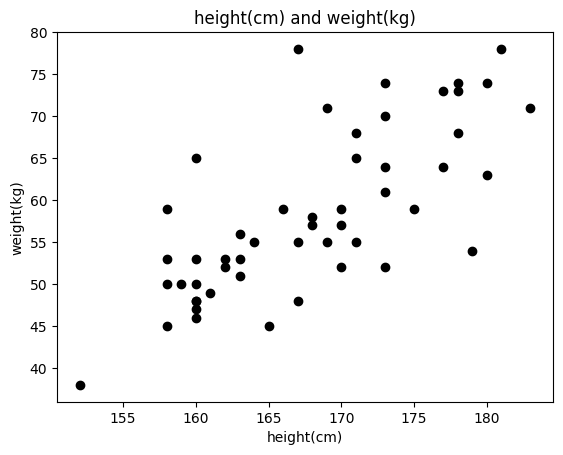

In [30]:
#산점도
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(height, weight, color='black')
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.title('height(cm) and weight(kg)')
plt.show()

## 5. 공분산 & 상관계수

In [34]:
import numpy as np

# 키(cm)와 몸무게(kg) 데이터 예시
height = np.array([165, 170, 175, 180, 185])
weight = np.array([60, 68, 72, 75, 85])

# 1. 공분산 계산
# 공분산 행렬(covariance matrix)이 반환됨
cov_matrix = np.cov(height, weight)
covariance = cov_matrix[0][1] # height와 weight 사이의 공분산
print(f"키와 몸무게의 공분산: {covariance:.2f}")


# 2. 상관계수 계산
# 상관계수 행렬(correlation matrix)이 반환됨
corr_matrix = np.corrcoef(height, weight)
correlation = corr_matrix[0][1] # height와 weight 사이의 상관계수
print(f"키와 몸무게의 상관계수: {correlation:.2f}")

키와 몸무게의 공분산: 71.25
키와 몸무게의 상관계수: 0.98


**공분산은 부호만 의미 있고 값 자체는 해석하기 어려움**

**상관계수는 값이 1 또는 -1에 가까울수록 강한 관계**

## 6. 이산확률분포

**(1). 베르누이 분포**

In [35]:
from scipy.stats import bernoulli

# 성공 확률 p (불량률)
p = 0.3

# k=1 (불량품, 즉 성공)일 확률 P(X=1)
prob_success = bernoulli.pmf(k=1, p=p)

print(f"제품이 불량품일 확률: {prob_success:.2f}") #결과: 0.30
print(f"제품이 정상품일 확률: {bernoulli.pmf(k=0, p=p):.2f}") #결과: 0.70

제품이 불량품일 확률: 0.30
제품이 정상품일 확률: 0.70


**(2). 이항 분포**

In [36]:
from scipy.stats import binom

# n: 총 시도 횟수, p: 성공 확률
n = 10
p = 0.5 # 동전 앞면이 나올 확률

# k=3 (성공 횟수)일 확률 P(X=3)
prob_3_heads = binom.pmf(k=3, n=n, p=p)

print(f"동전을 10번 던져 앞면이 3번 나올 확률: {prob_3_heads:.4f}")

동전을 10번 던져 앞면이 3번 나올 확률: 0.1172



**(관련 예제)**

10년간 평균적 4% 학생 색맹, 올해도 비율이 예년과 같음. 임의로 추출된 200명 학생 중 색맹인 학생이 10명 이하일 확률

In [44]:
from scipy import stats

#축적
print(round(stats.binom.cdf(10, 200, 0.04), 2))

0.82


**(3). 초기하 분포**

**비복원추출 상황에서의 성공 횟수에 대한 분포**

In [39]:
from scipy.stats import hypergeom

# M: 전체 공의 개수, n: 전체 공 중 성공(검은 공)의 개수, N: 뽑는 횟수
M = 10 # 7 + 3
n = 3  # 검은 공
N = 4  # 4개 뽑기

# k=2 (성공 횟수)일 확률 P(X=2)
prob_2_black = hypergeom.pmf(k=2, M=M, n=n, N=N)

print(f"4개 중 검은 공이 2개 나올 확률: {prob_2_black:.4f}")

4개 중 검은 공이 2개 나올 확률: 0.3000


**(4). 포아송 분포**

In [40]:
from scipy.stats import poisson

# mu (또는 lambda): 단위 시간/공간 당 평균 발생 횟수
mu = 5

# k=3 (실제 발생 횟수)일 확률 P(X=3)
prob_3_customers = poisson.pmf(k=3, mu=mu)

print(f"한 시간 동안 고객이 3명만 올 확률: {prob_3_customers:.4f}")

한 시간 동안 고객이 3명만 올 확률: 0.1404


## 7. 연속확률분포

**(1). 표준정규분포**

In [45]:
from scipy.stats import norm

# P(Z <= 1.37) 계산
prob_less_than = norm.cdf(1.37)

print(f"P(Z <= 1.37) = {prob_less_than:.4f}")

P(Z <= 1.37) = 0.9147


**(2). 정규점수 & 정규확률그림**

--- 정규점수 및 관측자료 ---
   관측 자료 (Ordered Data)  정규 점수 (Normal Score)
0                    44             -0.998149
1                    68             -0.291191
2                    75              0.291191
3                    82              0.998149


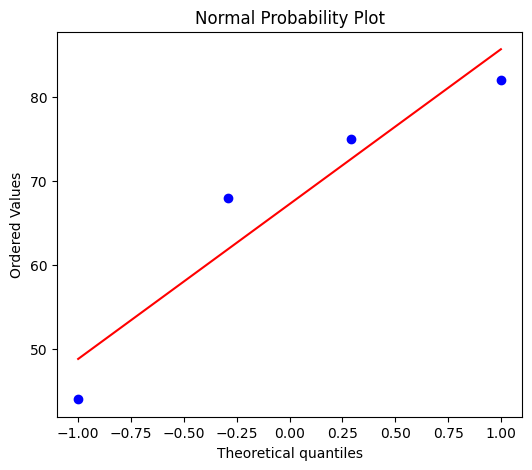

In [50]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd  # 결과를 표로 깔끔하게 보기 위해 사용

# 1. 주어진 관측자료
data = np.array([68, 82, 44, 75])

# 2. 정규점수 계산 (plot 인수를 생략하여 값만 반환받음)
# 반환값: (정규점수, 정렬된 데이터), (기울기, 절편, R^2)
(osm, osr), _ = stats.probplot(data, dist="norm")

# 3. 계산된 점수를 표(DataFrame)로 만들어 출력
print("--- 정규점수 및 관측자료 ---")
scores_df = pd.DataFrame({
    '관측 자료 (Ordered Data)': osr,
    '정규 점수 (Normal Score)': osm
})
print(scores_df)

# 4. 정규확률그림 생성 및 출력 (이전과 동일)
plt.figure(figsize=(6, 5))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Normal Probability Plot")
plt.show()

**(관련 예제1)**

**(i). 평균 63, 표준편차 10인 정규분포에서 50 이하의 확률**

In [51]:
from scipy.stats import norm
print(norm.cdf(x=50, loc=63, scale=10))

0.09680048458561036


**(ii). 상위 10%에 해당하는 값(누적확률 0.9)**

In [52]:
from scipy.stats import norm
print(norm.ppf(q=0.9, loc=63, scale=10))

75.815515655446


**(관련 예제2): 자료를 가지고 파이썬을 이용하여 정규확률그림을 그려라**

Text(0.5, 1.0, 'Normal Q-Q plot')

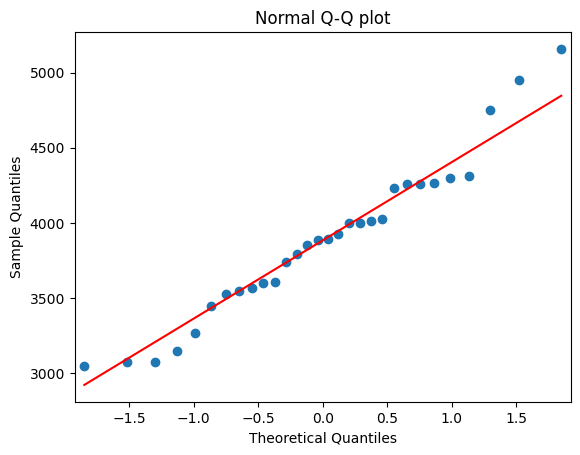

In [56]:
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

data = np.array([4001, 3927, 3048, 4298, 4000, 3445,
                4949, 3530, 3075, 4012, 3797, 3550,
                4027, 3571, 3738, 5157, 3598, 4749,
                4263, 3894, 4262, 4232, 3852, 4256,
                3271, 4315, 3078, 3607, 3889, 3147])

sm.qqplot(data, line='s')
## stats.probplot(data, dist="norm", plot=plt) 얘도 가능
plt.title("Normal Q-Q plot")

**(관련 예제3): 49그루의 나무 체적 측정 자료로 히스토그램을 그리고 적절한 변환을 하여 정규분포로 접근하라.**

Text(0.5, 1.0, 'Normal Q-Q plot')

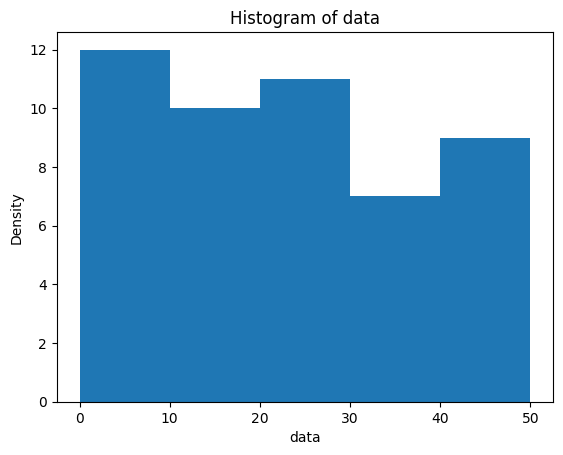

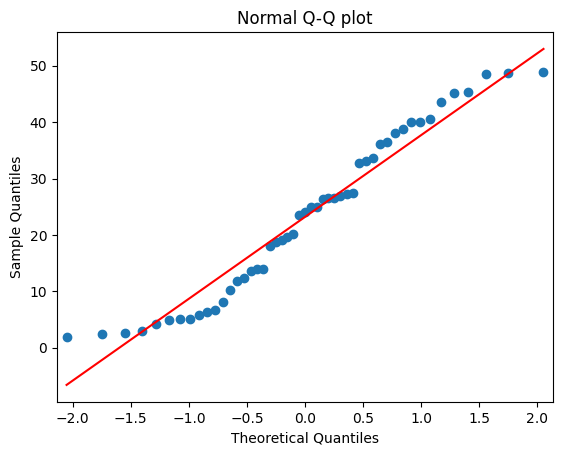

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1.0 (포함) ~ 40.0 (미포함) 범위에서 49개의 실수(float)를 랜덤으로 생성
data = np.random.uniform(low=1.0, high=50.0, size=49)

# (선택 사항) 소수점 첫째 자리까지만 보이도록 반올림
data = np.round(data, 1)

# 히스토그램
plt.hist(data, bins=5, range=(0, 50))
plt.xlabel('data')
plt.ylabel('Density')
plt.title('Histogram of data')

## 정규확률그림
sm.qqplot(data, line='s')
plt.title("Normal Q-Q plot")

**만약 데이터가 왼쪽으로 치우쳐져 있다면 다음과 같이 데이터를 제곱근, 네제곱근으로 변환할 수 있다.**

In [66]:
## 제곱근
data2 = np.sqrt(data)
## 네제곱근
data4 = np.power(data, 0.25)